In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D,MaxPooling2D,Flatten
import matplotlib.pyplot  as plt
import numpy as np
import cv2
%matplotlib inline

In [2]:
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [3]:
train_images=train_X
train_labels=train_y
test_images=test_X
test_labels=test_y

In [4]:
train_images.shape

(60000, 28, 28)

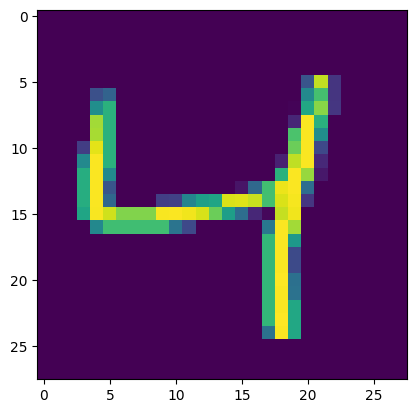

4


In [5]:
plt.close()

plt.imshow(train_images[2])

plt.show()

print(train_labels[2])

In [6]:
train_images=train_images/255
test_images=test_images/255

In [7]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [8]:
train_images=np.expand_dims(train_images,axis=3)
test_images=np.expand_dims(test_images,axis=3)

In [9]:
train_images.shape

(60000, 28, 28, 1)

In [10]:
model=Sequential()

model.add(Conv2D(filters=8, kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(10))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 8)         0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 1352)              0         
                                                                 
 dense (Dense)               (None, 32)                43296     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 43706 (170.73 KB)
Trainable params: 43706 (170.73 KB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [12]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [13]:
model.fit(train_images, train_labels, epochs=10, validation_data=(test_images,test_labels))

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2539 - accuracy: 0.9262 - val_loss: 0.1145 - val_accuracy: 0.9634
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0990 - accuracy: 0.9703 - val_loss: 0.0826 - val_accuracy: 0.9728
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0729 - accuracy: 0.9779 - val_loss: 0.0613 - val_accuracy: 0.9797
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0580 - accuracy: 0.9822 - val_loss: 0.0801 - val_accuracy: 0.9741
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0489 - accuracy: 0.9847 - val_loss: 0.0553 - val_accuracy: 0.9817
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0407 - accuracy: 0.9875 - val_loss: 0.0678 - val_accuracy: 0.9782
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0357 - accuracy: 0.9883 - val_loss: 0.0516 - val_ac

In [ ]:
model.save('ocr.h5')

In [ ]:
out=model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


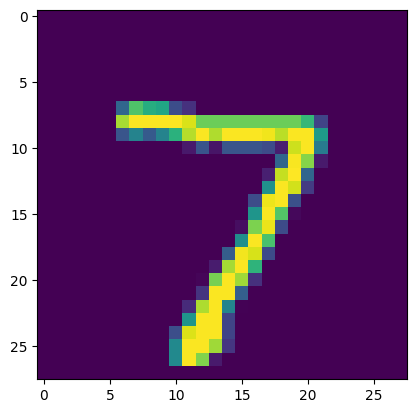

7


In [ ]:
plt.close()

plt.imshow(test_images[0])

plt.show()

print(test_labels[0])

In [ ]:
out[0]

array([ -9.574929  ,  -7.239087  ,  -0.77643466,   0.83230925,
       -12.533822  ,  -8.882752  , -26.84928   ,  12.792448  ,
        -5.10067   ,  -2.5631158 ], dtype=float32)

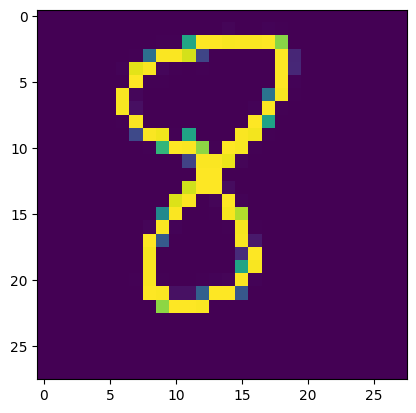

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
3


In [ ]:

# model.load_weights('ocr.h5')


img=cv2.imread('8.jpg')
img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img,(28,28))


img= cv2.bitwise_not(img)



img = img/255





plt.close()

plt.imshow(img)

plt.show()

img= np.array([img])


img=np.expand_dims(img, axis=3)


out2= model.predict(img)

m=-1000
o2=out2[0]
ind=-1

for i in range(len(o2)):
    if o2[i]>m:
        m=o2[i]
        ind=i


print(ind)